In [2]:
# import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from random import randrange
import pygraphviz as pgv
from pyvis.network import Network
%matplotlib inline

Read in relations file

In [3]:
pos_df = pd.read_csv('/homes/fabadmus/Internship/RA/target')
neg_df = pd.read_csv('/homes/fabadmus/Internship/RA/control')

In [4]:
# full_df = pd.concat([pos_df, neg_df],ignore_index=True)
full_df = pd.read_csv('/homes/fabadmus/Internship/RA/model_data_path')
full_df

,Unnamed: 0,subject,object,local_mi,label
0,0,TWDIS_09015,TWMET_01152,338112,POS
1,1,TWDIS_09015,TWMET_00191,50580,POS
2,2,TWDIS_09015,TWMET_00111,17888,POS
3,11,TWDIS_09015,TWMET_00036,4536,POS
4,15,TWDIS_09015,TWMET_00376,3312,POS
...,...,...,...,...,...
119,309,TWDIS_09536,TWMET_00269,112,NEG
120,310,TWDIS_09536,TWMET_01235,111,NEG
121,313,TWDIS_09536,TWMET_00347,109,NEG
122,314,TWDIS_09536,TWMET_00534,102,NEG


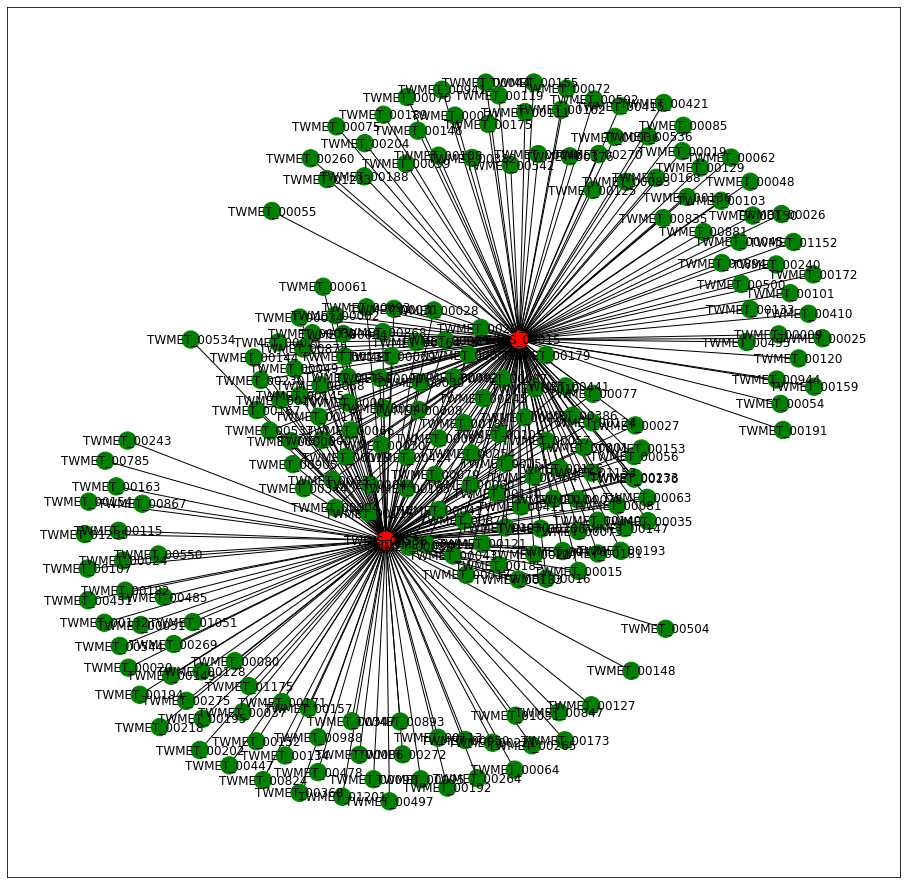

In [8]:
vis_df = pd.concat([pos_df, neg_df])
g = nx.from_pandas_edgelist(vis_df, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')
plt.figure(5, figsize=(16, 16))
pos =nx.spring_layout(g, iterations=20)
color_map = ['red' if node.startswith("TWDIS") else 'green' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos, with_labels = True)


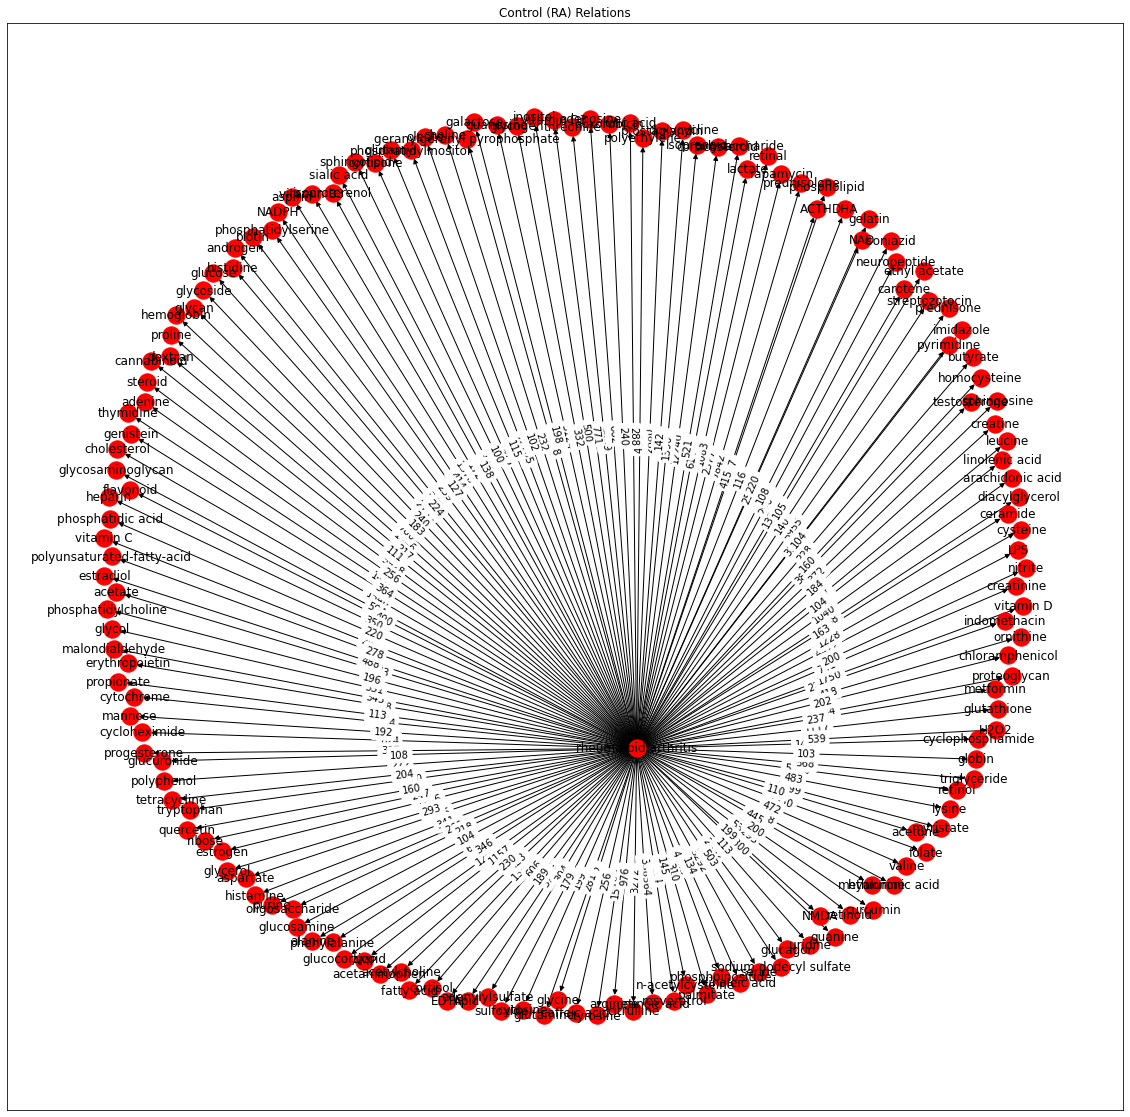

In [7]:
# convert positive parkinsons relations to graph
df_park = pd.read_csv('/homes/fabadmus/Internship/grad_project/neg_file')
g = nx.from_pandas_edgelist(df_park, "subject_annotated", "object_annotated", 'local_mi',
                            create_using=nx.DiGraph)
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=200)
nx.draw_networkx(g, node_color="red" , pos=pos)
nx.draw_networkx_edge_labels(g, 
pos=pos, 
edge_labels=nx.get_edge_attributes(g, 'local_mi'),
font_color="black",
);
plt.title('Control (RA) Relations')
plt.show()

In [ ]:
second_layer = pd.read_csv('/homes/fabadmus/Internship/PD/second_layer')

In [7]:
# convert the second_layer into a graph
second_layer = second_layer[second_layer.subject.str.startswith('TWDIS') == False]
G = nx.from_pandas_edgelist(second_layer, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')


In [37]:
len(G)

687

In [34]:
nodes = list(G.nodes)

# nodes.remove([i for i in nodes if i.startswith('TWDIS')])

sources = [i for i in nodes if i.startswith('TWDIS')]

for i in sources:
    nodes.remove(i)

In [11]:
#len(nodes)

687

In [9]:
# load the embeddings of the graph
embeddings = Word2Vec.load('/homes/fabadmus/Internship/RA/embedding')
# Convert embeddings to dataframe
emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))

                        for n in G.nodes], index=G.nodes))

#emb_df = (pd.DataFrame([embeddings.wv.get_vector]))

emb_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_00001,1.644263,-0.180890,1.940243,0.620728,-0.895461,-1.584973,-1.932025,-1.331041,1.360075,-0.715716,-0.853333,0.004136,0.392997,0.282796,1.774580,1.230428
TWMET_01235,0.776021,1.587449,1.546605,-0.720592,-1.542824,-3.203351,-3.664555,-1.473485,2.695433,-2.045681,-2.441652,-2.133015,0.873485,-1.676128,2.503896,2.091943
TWMET_00002,1.221255,0.126360,1.971171,0.599564,-0.982307,-1.737822,-2.206572,-0.688936,2.247230,-1.051839,-0.978371,-1.233741,0.918267,-0.056654,1.727597,1.386301
TWMET_00003,1.264771,0.039153,1.929051,0.276847,-1.222479,-2.180018,-2.405243,-1.197523,2.841284,-1.044188,-1.317308,-1.548740,0.493711,0.188232,1.861348,1.693338
TWMET_00004,1.381730,-0.116176,2.163795,0.552467,-1.214105,-2.042773,-2.137675,-1.317670,2.247272,-0.875825,-1.026240,-0.885677,0.099469,0.245165,2.089598,1.281412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWMET_01220,-0.038481,-0.041626,0.118822,0.138059,-0.080803,-0.094362,-0.090717,-0.115101,0.063195,-0.016578,-0.155415,0.057870,-0.020807,-0.065227,0.198674,0.215641
TWMET_01229,-1.629258,0.614767,0.038542,2.021360,-0.112586,-1.077297,-1.328672,0.307062,-0.257438,-0.835977,-0.700598,1.011659,1.212822,-0.840042,-0.488093,1.152583
TWMET_01230,-0.175071,0.093678,-0.092626,-0.186903,0.063061,-0.040739,0.018395,0.126959,0.174750,-0.004189,-0.118375,-0.200045,0.039625,-0.063009,0.026214,-0.082282
TWMET_01236,-2.810947,-3.361665,0.673997,2.731825,1.554977,1.849713,0.712120,0.142707,-1.382105,-0.401146,-1.125981,-0.766873,-3.189028,-3.044743,3.770117,0.935385


In [10]:
emb_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_01220,-0.038481,-0.041626,0.118822,0.138059,-0.080803,-0.094362,-0.090717,-0.115101,0.063195,-0.016578,-0.155415,0.057870,-0.020807,-0.065227,0.198674,0.215641
TWMET_01229,-1.629258,0.614767,0.038542,2.021360,-0.112586,-1.077297,-1.328672,0.307062,-0.257438,-0.835977,-0.700598,1.011659,1.212822,-0.840042,-0.488093,1.152583
TWMET_01230,-0.175071,0.093678,-0.092626,-0.186903,0.063061,-0.040739,0.018395,0.126959,0.174750,-0.004189,-0.118375,-0.200045,0.039625,-0.063009,0.026214,-0.082282
TWMET_01236,-2.810947,-3.361665,0.673997,2.731825,1.554977,1.849713,0.712120,0.142707,-1.382105,-0.401146,-1.125981,-0.766873,-3.189028,-3.044743,3.770117,0.935385
TWMET_00728,-2.779554,-3.285468,0.683892,2.838270,1.525937,1.849864,0.726584,0.295253,-1.261031,-0.476441,-1.187333,-0.625711,-2.997901,-3.014127,3.714213,1.020245


In [11]:
# get set of positive and negative concepts from the full data
pos = set(full_df[full_df['label'] == 'POS'].object)
neg = set(full_df[full_df['label'] == 'NEG'].object)

In [12]:
# create separate dataframes of embeddings bases on the sets
emb_df_pos = emb_df[emb_df.index.isin(pos)]
emb_df_pos['set'] = 'POS'
emb_df_neg = emb_df[emb_df.index.isin(neg)]
emb_df_neg['set'] = 'NEG'

/tmp/ipykernel_13788/3669145909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_pos['set'] = 'POS'
/tmp/ipykernel_13788/3669145909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_neg['set'] = 'NEG'


In [41]:
# inspecting
emb_df_pos.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00012,0.082339,-0.124418,0.049686,0.250147,-0.126926,0.300732,0.224311,0.103815,-0.154449,-0.037307,0.256696,-0.339353,0.063294,-0.419076,0.173135,0.054305,POS
TWMET_00014,-1.682035,-0.586706,1.624900,-0.340181,0.082217,1.256704,0.906532,-0.148675,-0.357293,-0.587695,-0.791593,-0.548137,-0.488113,0.629673,0.542212,0.847941,POS
TWMET_00020,0.115131,-0.366627,0.184191,0.639838,-0.277170,0.757327,0.745076,0.195124,-0.131458,-0.276830,0.537110,-0.711890,-0.093656,-0.800208,0.139523,0.178693,POS
TWMET_00037,0.393527,-0.557350,1.209554,0.866081,-0.010206,0.092905,0.173888,-1.750960,-0.334285,1.316070,0.849253,-0.257132,-1.083380,0.123559,-1.650859,-0.350870,POS
TWMET_00058,0.186804,-0.261844,0.551088,0.676515,0.029099,-0.030477,0.056892,-1.121290,0.130367,0.656967,0.698667,-0.257863,-0.385986,0.243075,-0.757572,-0.174670,POS


In [42]:
emb_df_neg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00001,-0.166794,-0.414775,0.862989,0.993104,-0.124340,0.283832,0.331494,-1.788472,-0.073697,1.460505,1.278105,0.003435,-0.688558,-0.001655,-1.121781,-0.568167,NEG
TWMET_01233,1.078644,-0.208790,2.685074,1.757169,-1.078023,-0.299977,0.834498,-1.599384,-0.407026,2.403081,1.662401,0.492739,-0.886435,-0.313841,-2.582333,-0.933762,NEG
TWMET_00003,-1.973890,1.003182,2.582344,-2.656549,-0.403502,1.049502,0.925483,0.136950,2.689487,-2.026960,1.912322,0.852008,-2.519128,0.029521,-4.356495,0.691040,NEG
TWMET_00005,0.400628,-0.520462,0.947253,0.881703,-0.048081,0.238179,0.267571,-1.414613,-0.245207,1.004829,0.898660,-0.135605,-0.594855,0.124982,-1.085075,-0.508936,NEG
TWMET_00009,-0.412137,1.552739,-0.892121,1.623629,-3.237462,2.009775,1.458898,1.063337,-2.102864,-2.273246,-0.259617,-3.631285,-2.160759,2.265352,0.328774,-1.616835,NEG


In [13]:
# inspecting
print(len(emb_df_pos))
print(len(emb_df_neg))

61
63


In [14]:
# create a dataframe for the training from the labeled concepts
model_df = pd.concat([emb_df_pos, emb_df_neg])
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_01233,0.453604,0.756688,-1.122252,-0.716567,-0.171605,-0.846921,-0.603779,0.760074,1.961291,-0.817789,-1.763236,-5.066936,2.159103,-1.223586,2.611709,2.128220,POS
TWMET_00009,1.439852,0.133369,2.133551,0.556434,-0.906368,-2.436686,-2.811059,-0.361259,2.889997,-0.939985,-1.688207,-1.673908,0.658289,0.080440,2.029799,1.571916,POS
TWMET_00019,-1.207557,0.472702,-1.148168,-0.913764,-0.040970,-1.168881,-0.466766,0.668951,2.378271,-0.363549,-2.572777,-3.324969,0.710769,-1.114544,0.920034,1.087745,POS
TWMET_00025,-0.652996,0.107013,-0.396332,-0.411501,0.601956,-0.197136,0.103382,0.292274,1.108670,-0.033310,-0.963166,-1.724627,0.554896,-0.479772,0.685021,0.660318,POS
TWMET_00026,-0.220423,-0.312817,-0.479627,2.844195,-1.323704,-2.298659,0.432182,0.628251,-3.536722,-1.966558,-3.339813,-0.804151,-1.353096,-3.871927,-0.995532,3.721175,POS


In [15]:
# create validation data from the embedding data
validation_df = pd.concat([emb_df_pos, emb_df_neg, emb_df]).drop_duplicates(
    subset=emb_df.columns[:-1], keep=False)
validation_df = validation_df[validation_df.index.str.startswith('TWDIS') == False]
validation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00001,1.644263,-0.180890,1.940243,0.620728,-0.895461,-1.584973,-1.932025,-1.331041,1.360075,-0.715716,-0.853333,0.004136,0.392997,0.282796,1.774580,1.230428,NaN
TWMET_00002,1.221255,0.126360,1.971171,0.599564,-0.982307,-1.737822,-2.206572,-0.688936,2.247230,-1.051839,-0.978371,-1.233741,0.918267,-0.056654,1.727597,1.386301,NaN
TWMET_00003,1.264771,0.039153,1.929051,0.276847,-1.222479,-2.180018,-2.405243,-1.197523,2.841284,-1.044188,-1.317308,-1.548740,0.493711,0.188232,1.861348,1.693338,NaN
TWMET_00004,1.381730,-0.116176,2.163795,0.552467,-1.214105,-2.042773,-2.137675,-1.317670,2.247272,-0.875825,-1.026240,-0.885677,0.099469,0.245165,2.089598,1.281412,NaN
TWMET_00005,-0.499375,-0.028696,-0.537072,-0.281104,0.547436,-0.394621,0.216946,0.528115,1.096683,-0.288817,-1.084237,-2.145854,0.315849,-0.309421,0.723954,0.693734,NaN


In [21]:
# # plot the graph
# plt.figure(10, figsize=(20, 20))

# pos =nx.spring_layout(G)
# nx.draw_networkx(G, node_color="blue" , pos=pos, with_labels = True, )

# # nx.draw_networkx_edge_labels(G, 
# # edge_labels=nx.get_edge_attributes(G, 'local_mi'),
# # font_color="red",
# # );
# plt.show() copy of df
# val_df = validation_df.copy()
# val_df.head()

In [22]:
# model_df.reset_index(inplace = True)

In [16]:
# assign the independent and dependent variables
X = model_df.iloc[:,:-1].values
y = model_df['set']

In [25]:
pos_data = model_df[model_df.set == 'POS']
x_pos = pos_data.iloc[:,:-1].values
y_pos = pos_data['set'].values
neg_data = model_df[model_df.set == 'NEG']
x_neg = neg_data.iloc[:,:-1].values
y_neg = neg_data['set'].values




def get_rand_data(list_of_x: list, list_of_y: list, max_count: int) -> list:
    # list_of_names = list(list_of_names)
    x_vals = []
    y_vals = []
    for index in range(max_count):
        index = randrange(start=0, stop=len(list_of_x)+1)
        x_vals.append(list_of_x[index])
        y_vals.append(list_of_y[index])
    return x_vals, y_vals


pos_x_data, pos_y_data = get_rand_data(x_pos, y_pos, 25)
neg_x_data, neg_y_data = get_rand_data(x_neg, y_neg, 25)
#print(len(test_list_y))

X_bal = np.array(pos_x_data + neg_x_data)
y_bal = np.array(pos_y_data + neg_y_data)

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.3, random_state=42) 

model4 = RandomForestClassifier(random_state=0)
model4.fit(X_train, y_train)
# make predictions
pred = model4.predict(X_test)
print(classification_report(y_test, pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model4, X_test, y_test)
plt.show()


In [17]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) 

In [168]:
# model 3
#Import svm model
from sklearn import svm

#Create a svm Classifier
model3 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model3.predict(X_test)

In [169]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6944444444444444


/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


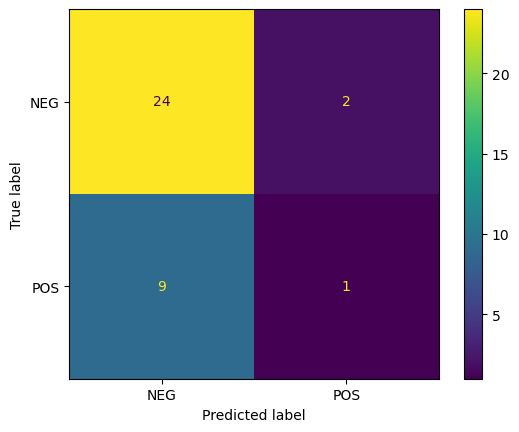

In [170]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model3, X_test, y_test)
plt.show()

In [77]:
# do clusttering
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [79]:
kmeans = KMeans(
   init="random",
     n_clusters=2,
    n_init=10,
   max_iter=300,
  random_state=42)
   

In [80]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [81]:
kmeans.n_iter_

9

In [82]:
kmeans.labels_[:5]

array([0, 0, 1, 1, 0], dtype=int32)

In [84]:
kmeans_silhouette = silhouette_score(
scaled_features, kmeans.labels_
   ).round(2)
kmeans_silhouette

0.3

In [108]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(scaled_features)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_ ).round (2)

In [109]:
dbscan.labels_

array([-1, -1, -1, -1,  2, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  1, -1,  1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  2,
       -1, -1, -1,  1, -1,  0,  1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1,  0,  1, -1, -1,  0,  1, -1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  0, -1,  1, -1,  1, -1, -1,  0, -1])

Text(0.5, 1.0, 'k-means\nSilhouette: 0.30000001192092896')

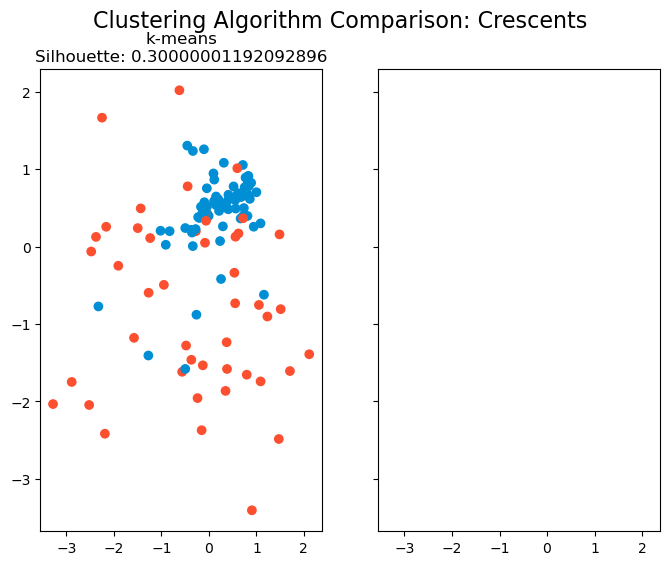

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {0: "#008fd5",1: "#fc4f30"}
 # The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})
# #The dbscan plot
# db_colors = [fte_colors[label] for label in dbscan.labels_]
# ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
# ax2.set_title( f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
# plt.show()


In [21]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

model2 = RandomForestClassifier(random_state=0, class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=0.5, min_samples_leaf=3)

score = cross_val_score(model2, X_train, y_train,  scoring="accuracy")
model2.fit(X_train, y_train)


/commons/conda/dsls/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=0.5, min_samples_leaf=3,
                       random_state=0)

In [27]:
print(f'Scores are: {score}')

Scores are: [0.95238095 0.95238095 1.         1.         0.95      ]


/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


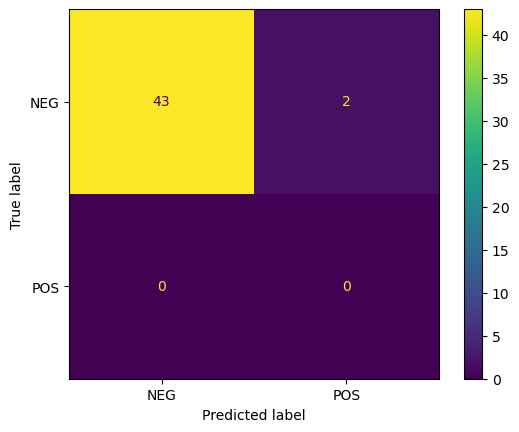

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

In [29]:
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         NEG       1.00      0.96      0.98        45
         POS       0.00      0.00      0.00         0

    accuracy                           0.96        45
   macro avg       0.50      0.48      0.49        45
weighted avg       1.00      0.96      0.98        45



/commons/conda/dsls/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/commons/conda/dsls/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/commons/conda/dsls/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


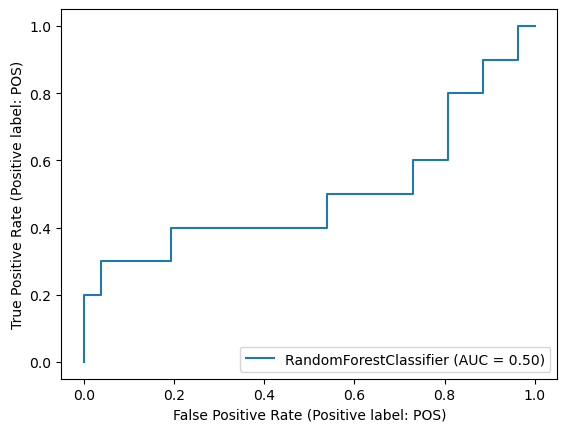

In [121]:
metrics.plot_roc_curve(model2, X_test, y_test)

In [176]:
# make predictions on the unknown
X_val = validation_df.iloc[:,:-1]

pred = model2.predict(X_val)

In [177]:
# get the prediction probabilities of the model data
val_proba = model2.predict_proba(X_val)
# val_proba

In [178]:
# get the prediction probabilities of the model data
val_proba = model2.predict_proba(X_val)
# val_proba

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf':[3,5,7,10,15],'max_features':[0.5,'sqrt','log2'],
          'max_depth':[10,15,20],
          'class_weight':[{"POS":1,"NEG":1},'balanced'],
          'criterion':['entropy','gini']}


model1 = GridSearchCV(RandomForestClassifier(),param_grid, verbose=1,n_jobs=-1,scoring='roc_auc')
model1.fit(X_train,y_train)
print ('\n',model1.best_estimator_)
# # fit model
# model1 = RandomForestClassifier(random_state=42)

# model1.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits

 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_leaf=10)


In [22]:
# make predictions
pred = model1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         NEG       0.56      0.53      0.55        17
         POS       0.64      0.67      0.65        21

    accuracy                           0.61        38
   macro avg       0.60      0.60      0.60        38
weighted avg       0.60      0.61      0.60        38



/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


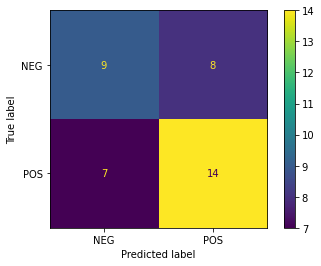

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


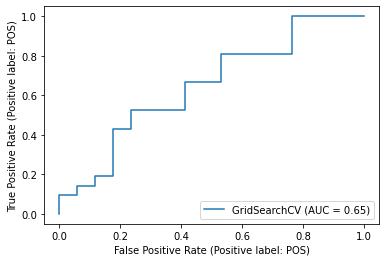

In [24]:
metrics.plot_roc_curve(model1, X_test, y_test)

In [40]:
# predicting the whole model data with the model
predictions = model1.predict(X)

In [41]:
# get the prediction probabilities of the model data
predict_proba = model1.predict_proba(X)
# predict_proba

In [42]:
# convert predictions and actual values to dataframe
predict_proba_df = pd.DataFrame(predict_proba, index=X.index,
                                columns=['NEG_prob', 'POS_prob'])
predict_proba_df['predictions'] = predictions
predict_proba_df['actual_values'] = model_df['set']
predict_proba_df

,NEG_prob,POS_prob,predictions,actual_values
TWMET_00170,0.47,0.53,POS,POS
TWMET_00012,0.19,0.81,POS,POS
TWMET_01157,0.17,0.83,POS,POS
TWMET_00848,0.24,0.76,POS,POS
TWMET_00037,0.88,0.12,NEG,POS
...,...,...,...,...
TWMET_00101,0.97,0.03,NEG,NEG
TWMET_00415,0.81,0.19,NEG,NEG
TWMET_01030,0.92,0.08,NEG,NEG
TWMET_00410,0.77,0.23,NEG,NEG


In [ ]:
# # get set of positive and negative concepts from the second layer data
# pos_second = set(second_layer[second_layer['subject'] == 'TWDIS_06685'].object)
# neg_second = set(second_layer[second_layer['subject'] ==  'TWDIS_09015'].object)
# print(neg_second)
# # label validation_df

# # mask = val_df[val_df.index.isin(pos_second)]

# # val_df.loc[mask, 'set'] = 'POS'
# val_df['set'].loc[val_df.index.isin (pos_second)] = 'POS'


: 

In [ ]:
#val_df['set'].loc[val_df.index.isin (neg_second)] = 'NEG'

: 

In [43]:
# make predictions on the unknown
X_val = val_df.iloc[:,:-1]

pred = model1.predict(X_val)


In [44]:
# get the prediction probabilities of the model data
val_proba = model1.predict_proba(X_val)
# val_proba

In [45]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] = pred
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_00453,0.29,0.71,POS
TWMET_00492,0.29,0.71,POS
TWMET_00176,0.31,0.69,POS
TWMET_00764,0.31,0.69,POS
TWMET_00254,0.31,0.69,POS
...,...,...,...
TWMET_00706,1.00,0.00,NEG
TWMET_00751,1.00,0.00,NEG
TWMET_00824,1.00,0.00,NEG
TWMET_00852,1.00,0.00,NEG


In [49]:
len(val_proba_df[val_proba_df.predictions == 'POS'])

24

In [46]:
import requests
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(val_proba_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
val_proba_df['annotation'] = annotated_ids
val_proba_df.head(10)

,NEG_prob,POS_prob,predictions,annotation
TWMET_00453,0.29,0.71,POS,isocitrate
TWMET_00492,0.29,0.71,POS,oxaloacetate
TWMET_00176,0.31,0.69,POS,n-acetylcysteine
TWMET_00764,0.31,0.69,POS,5-hydroxyindole-3-acetic acid
TWMET_00254,0.31,0.69,POS,NADP
TWMET_00529,0.32,0.68,POS,semialdehyde
TWMET_00067,0.33,0.67,POS,morphine
TWMET_01225,0.35,0.65,POS,valproic acid
TWMET_01208,0.35,0.65,POS,tocopherol acetate
TWMET_00436,0.35,0.65,POS,glyoxylate


In [106]:
metabs = val_proba_df[['POS_prob', 'annotation']].head(10)
pd.DataFrame.to_csv(metabs, '/homes/fabadmus/Internship/result1.tsv', sep='\t') 

Choosing second Second_layer 

In [41]:
full_second_layer = pd.read_csv('/homes/fabadmus/Internship/grad_project/test_file')
full_second_layer.head()

,Unnamed: 0,subject,predicate,object,overlap,score,local_mi
0,0,TWMET_00001,REL_9999,TWMET_00001,535243,47,25156421
1,1,TWMET_00001,REL_9999,TWMET_00002,63340,5,316700
2,2,TWMET_00001,REL_9999,TWMET_00003,42063,7,294441
3,3,TWMET_00001,REL_9999,TWMET_00004,33413,6,200478
4,4,TWMET_00001,REL_9999,TWMET_00005,3694,1,3694


In [42]:
full_second_layer = full_second_layer[['subject', 'object', 'score', 'overlap','local_mi']]
# full_second_layer = full_second_layer[full_second_layer['score'] >= 1]
# full_second_layer= full_second_layer[full_second_layer['overlap'] >= 100].reset_index(drop=True)
full_second_layer= full_second_layer.drop(columns = ['score', 'overlap'])
# full_second_layer.sort_values('local_mi', ascending=False, inplace=True)
# filter out self loops
full_second_layer= full_second_layer[full_second_layer['subject'] != full_second_layer['object']]


In [14]:
# get relations with the highest local_mi
full_second_layer= full_second_layer.groupby(['subject'])[['object', 'local_mi']].max(2).reset_index()
full_second_layer

,subject,local_mi
0,TWMET_00001,584080
1,TWMET_00002,1859958
2,TWMET_00003,4352940
3,TWMET_00004,3122672
4,TWMET_00005,531144
...,...,...
1184,TWMET_01229,926694
1185,TWMET_01230,5461
1186,TWMET_01231,32214
1187,TWMET_01232,519137


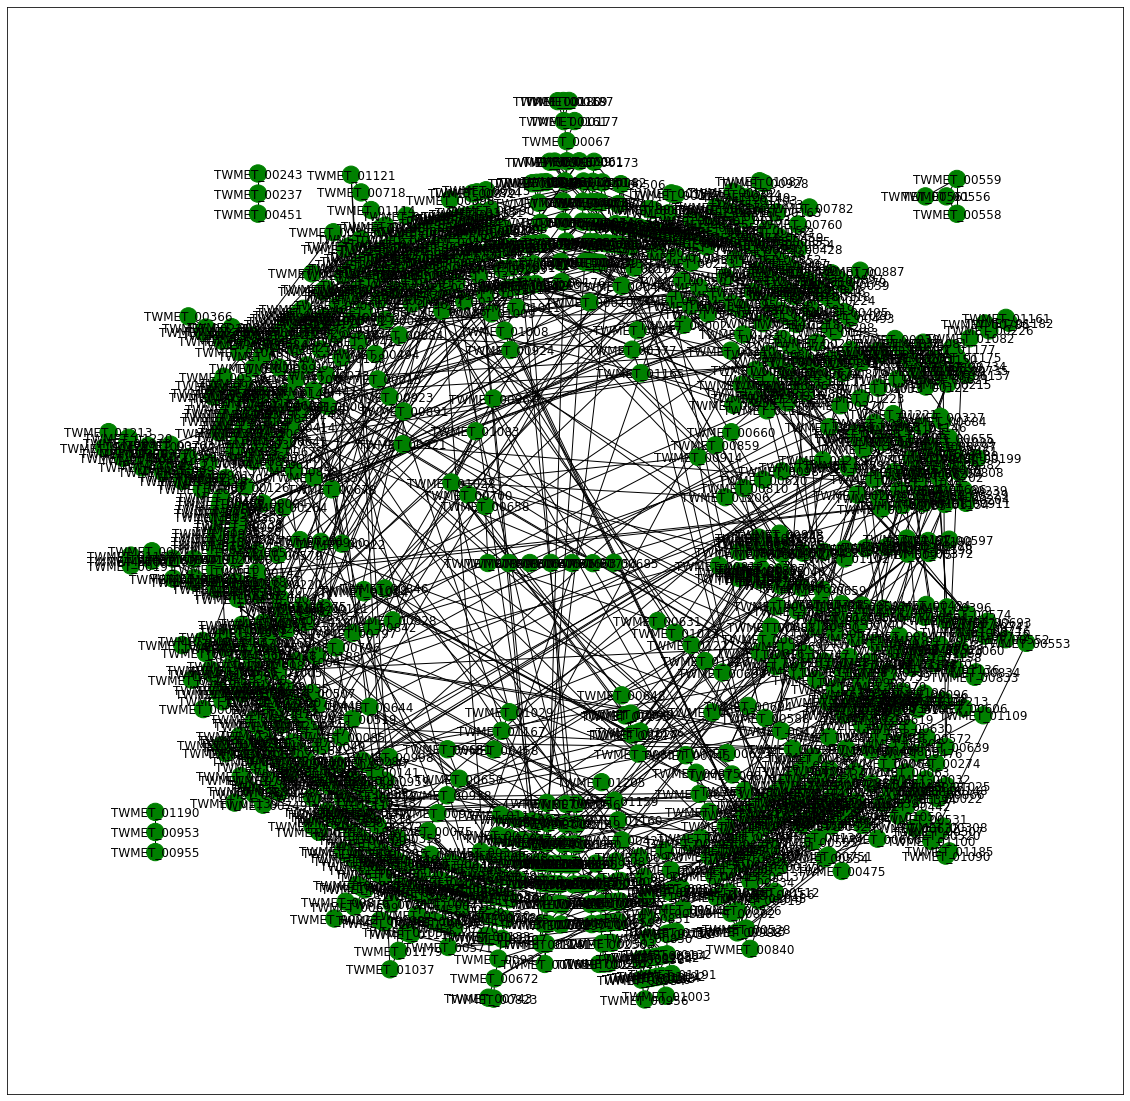

In [32]:
#full_second_layer = pd.read_csv('/homes/fabadmus/Internship/RA/second_layer')
g = nx.from_pandas_edgelist(full_second_layer, source='subject',
                            target='object')
# plot the graph
plt.figure(10, figsize=(20, 20))
#pos = nx.spring_layout(g, weight='local_mi', iterations=20)
pos = nx.nx_agraph.graphviz_layout(g, prog="twopi", args="")
# test[test == '0'] = '#C6442A'
# test[test == '1'] = '#9E2AC6'
color_map = ['red' if node.startswith("TWDIS") else 'green' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'local_mi'), font_color="black",
);
plt.title('')
plt.show()

In [80]:
from heapq import nlargest
full_second_layer = full_second_layer[full_second_layer.subject.str.startswith('TWDIS') == False].reset_index()

# full_second_layer.sort_values(['object', 'local_mi'],ascending=False).groupby(['subject']).head(3)

In [82]:
full_second_layer.groupby(['subject', 'object'])[['local_mi']].max()

local_mi
subject     object               
TWMET_00001 TWMET_00002    316700
            TWMET_00003    294441
            TWMET_00004    200478
            TWMET_00005      3694
            TWMET_00006      5351
...                           ...
TWMET_01233 TWMET_01173       309
            TWMET_01174       351
            TWMET_01202       400
            TWMET_01230      5461
            TWMET_01232      3198

[11842 rows x 1 columns]

In [43]:
# full_second_layer.groupby(['subject'])[['object', 'local_mi']].nlargest(2)
full_second_layer = full_second_layer.groupby(['subject']).apply(lambda x: x.sort_values(['local_mi'], ascending = False)[:2])
full_second_layer = full_second_layer[['subject', 'object', 'local_mi']]
full_second_layer = full_second_layer.set_index('subject').reset_index()
full_second_layer

,subject,object,local_mi
0,TWMET_00001,TWMET_00011,584080
1,TWMET_00001,TWMET_00411,466026
2,TWMET_00002,TWMET_00003,1859958
3,TWMET_00002,TWMET_00011,1620212
4,TWMET_00003,TWMET_00011,4352940
...,...,...,...
2369,TWMET_01231,TWMET_00402,20770
2370,TWMET_01232,TWMET_00047,519137
2371,TWMET_01232,TWMET_00206,202575
2372,TWMET_01233,TWMET_00092,41488
